In [100]:
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier

# test and train data

In [2]:
test = pd.read_csv("test_1.csv")

In [22]:
x = test.iloc[:,:18]
y = test.iloc[:,18:19]

# scale

In [57]:
scaler = StandardScaler()

In [70]:
x_1 = scaler.fit_transform(x)

In [71]:
x_1 = pd.DataFrame(x_1)

# linier regresion

In [73]:
reg = LinearRegression().fit(x_1, y)

In [74]:
reg.score(x, y)

-4.805225567427499e+35

In [75]:
reg.coef_

array([[-1.15006442e-01, -1.22680141e-01,  3.63041939e-03,
         1.44104509e-01,  1.93693869e-01, -6.14342128e-03,
        -1.08509922e-01,  4.73406229e-08, -7.72871600e-03,
        -3.01097507e-03, -3.41347640e-03,  4.89272268e-02,
        -6.59792780e-02,  3.11312870e-02,  4.55064398e-02,
         2.81862670e-03,  1.05160866e-02,  5.60302766e-02]])

In [76]:
reg.intercept_ 

array([0.47865169])

# Decesion tree

In [96]:
tree_reg = DecisionTreeRegressor()
scores = cross_val_score(tree_reg, x_1, y, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [97]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(rmse_scores)

Scores: [0.57735027 0.42163702 0.42163702 0.47140452 0.36514837 0.39886202
 0.33709993 0.33709993 0.42640143 0.30151134]
Mean: 0.4058151861723295
Standard deviation: 0.07528326524170473


# Training a BinaryClassifier

In [113]:
x_1a = np.asarray(x_1)
y_1a = np.asarray(y)
y_1a = y_1a.ravel()

In [114]:
y_1a.shape

(445,)

In [121]:
sgd_clf = SGDClassifier(random_state=19)
cro = cross_val_score(sgd_clf, x_1a, y_1a, cv=10, scoring="accuracy")

D:\program\python\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
D:\program\python\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
D:\program\python\anaconda

In [122]:
np.mean(cro)

0.6854874835309619

# correlation matrix

In [43]:
corr_matrix = x.corr()

In [53]:
ar = corr_matrix["Magnitudo"].sort_values(ascending=False)

# scatter plot

<IPython.core.display.Javascript object>


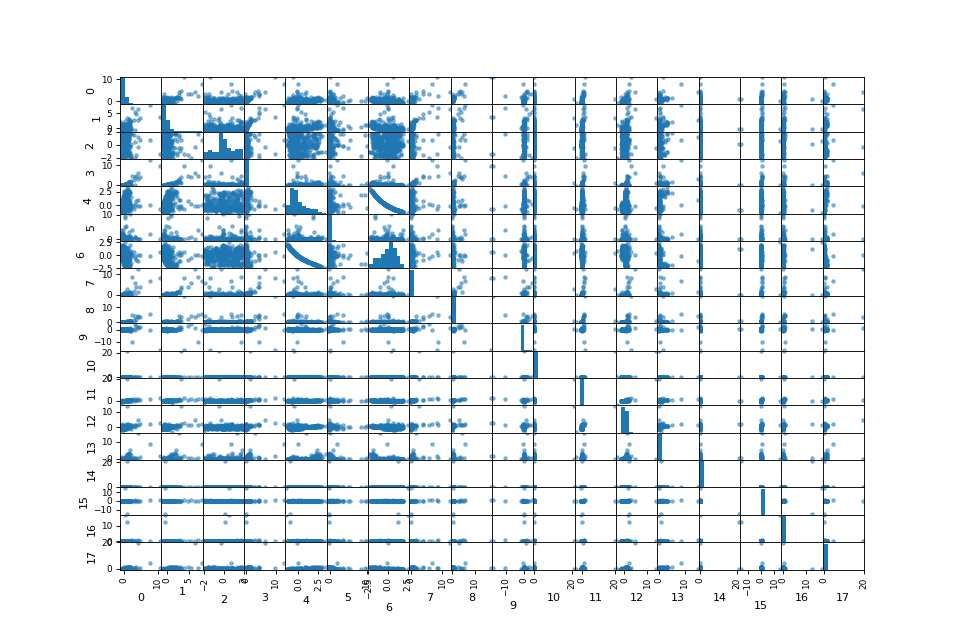

In [72]:
scatter_matrix(x_1, figsize=(12, 8))
# savefig("example.png", bbox_inches='tight')
plt.savefig("example.png")

# test area

In [99]:
x_1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.287727,-0.246374,1.052635,-0.207257,-0.507816,-0.279969,0.395551,-0.219810,-0.181140,0.028365,-0.047458,-0.079889,0.239259,-0.240969,-0.047584,-0.013406,-0.027928,-0.147535
1,0.047224,-0.056661,-0.089026,-0.093941,0.464834,-0.136272,-0.676052,-0.209182,-0.137449,0.033148,-0.047458,-0.028671,0.247926,0.015521,-0.047577,-0.003438,-0.019379,-0.009449
2,0.975805,0.966833,0.531024,0.537389,1.179074,-0.124502,-1.231291,0.116156,0.102108,0.060111,-0.047458,0.212274,0.456209,0.157837,-0.047563,0.049848,0.045644,0.284550
3,-0.418819,-0.488880,-0.608548,-0.275246,-0.843525,-0.238472,0.923764,-0.241659,-0.171815,-0.001481,-0.047458,-0.097849,0.258743,-0.258703,-0.047590,-0.025251,-0.212241,-0.162750
4,0.254664,0.140786,0.965778,0.006424,-0.815062,-0.061271,0.873936,-0.112665,0.010002,0.057154,-0.047458,0.056746,-1.158784,-0.180102,-0.047582,-0.002111,0.005105,-0.138841
5,2.884170,2.733336,1.531850,2.544696,-0.658747,-0.045842,0.618097,1.633287,1.423071,0.347257,-0.047458,0.490222,0.942474,0.325336,-0.047568,0.110630,0.139089,0.205404
6,-0.107157,0.122413,-0.828119,-0.087466,-0.353904,-0.213586,0.188908,-0.092665,-0.131152,0.054717,-0.047458,-0.035069,0.311441,-0.255370,-0.047581,0.011052,0.014993,-0.149286
7,0.483591,0.307209,0.391870,0.126215,1.446656,-0.059300,-1.408922,-0.105235,-0.049235,0.034081,-0.047458,0.073014,0.334549,0.112087,-0.047566,0.013191,0.003416,-0.036278
8,-0.390378,0.337290,-0.822923,-0.132792,-0.763058,-0.161246,0.785609,0.093534,-0.161597,0.198893,-0.047458,-0.103301,0.229111,-0.264519,-0.047584,0.063668,-0.021634,-0.045302
9,-0.013403,-0.041081,1.413940,-0.103654,-0.581202,-0.074475,0.501058,-0.082958,-0.094244,0.059090,-0.047458,0.006629,0.283883,-0.185411,-0.047583,-0.001155,-0.005848,-0.034803
